In [1]:
#Exploration initiale
import pandas as pd

# Chargement du jeu de données à partir d'un fichier CSV (par exemple)
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/traffic_matrix_unfiltered_m1_40000_chiffre.csv')   
# Affichage des premières lignes du jeu de données
print(data.head())
print('-----------------------------------------------------------')
# Informations sur le jeu de données
print(data.info())
print('-----------------------------------------------------------')
# Taille du jeu de données
print("Nombre d'observations :", data.shape[0])
print('-----------------------------------------------------------')
print("Nombre de variables :", data.shape[1])

# Types de données des variables
print(data.dtypes)
print('-----------------------------------------------------------')
# Statistiques descriptives sommaires
print(data.describe())
print('-----------------------------------------------------------')

# Nombre de valeurs manquantes par variable
print(data.isnull().sum())

   Unnamed: 0  start_date    end_date                          a_number  \
0           0  2021-12-01  2021-12-31  805249d5353b56beffe265acb21d2922   
1           1  2021-12-01  2021-12-31  805249d5353b56beffe265acb21d2922   
2           2  2021-12-01  2021-12-31  805249d5353b56beffe265acb21d2922   
3           3  2021-12-01  2021-12-31  805249d5353b56beffe265acb21d2922   
4           4  2021-12-01  2021-12-31  805249d5353b56beffe265acb21d2922   

   a_own                          b_number  b_own  duration  duration_wh  \
0   True  c0cd71c4d34d274eca6aa7d3be7f66a4  False   10135.0       2679.0   
1   True  f849a35b994ebbde78d26aa7e507a589   True    1041.0        422.0   
2   True  f7bbf080d6d62e98b98784957f31ee37   True    6190.0       2770.0   
3   True  ca215256553a2ba6e75728c224658482  False      82.0          0.0   
4   True  62a248714a24f84a59ab89a9e07866be  False       3.0          3.0   

   num_interactions  ...  traffic_days_sms  duration_voix  duration_voix_wh  \
0            

Unnamed: 0                  0
start_date                  0
end_date                    0
a_number                    0
a_own                       0
b_number                    0
b_own                       0
duration                    0
duration_wh                 0
num_interactions            0
num_interactions_wh         0
traffic_days                0
num_interactions_voix       0
num_interactions_voix_wh    0
num_interactions_sms        0
num_interactions_sms_wh     0
traffic_days_voix           0
traffic_days_sms            0
duration_voix               0
duration_voix_wh            0
duration_sms                0
duration_sms_wh             0
offnet                      0
short_flag                  0
id_date                     0
dn                          0
id_date.1                   0
dtype: int64


In [3]:
columns_to_drop1 =['id_date','id_date.1','end_date','start_date','duration_sms','duration_sms_wh']
data2 = data.drop(columns=columns_to_drop1)
data2 = data2.drop(data2.columns[0], axis=1)

In [4]:
descriptive_stats = data2.describe()
print(descriptive_stats)

            duration    duration_wh  num_interactions  num_interactions_wh  \
count  400000.000000  400000.000000     400000.000000        400000.000000   
mean      519.081960     204.072455          5.206313             2.342227   
std      3608.515474    1297.064917         14.743555             6.320080   
min         0.000000       0.000000          1.000000             0.000000   
25%        29.000000       0.000000          1.000000             0.000000   
50%        89.000000      25.000000          2.000000             1.000000   
75%       280.000000     115.000000          4.000000             2.000000   
max    613854.000000  251035.000000       2358.000000           468.000000   

        traffic_days  num_interactions_voix  num_interactions_voix_wh  \
count  400000.000000          400000.000000             400000.000000   
mean        2.736347               4.883280                  2.221687   
std         3.737686              12.063141                  5.737165   
min  

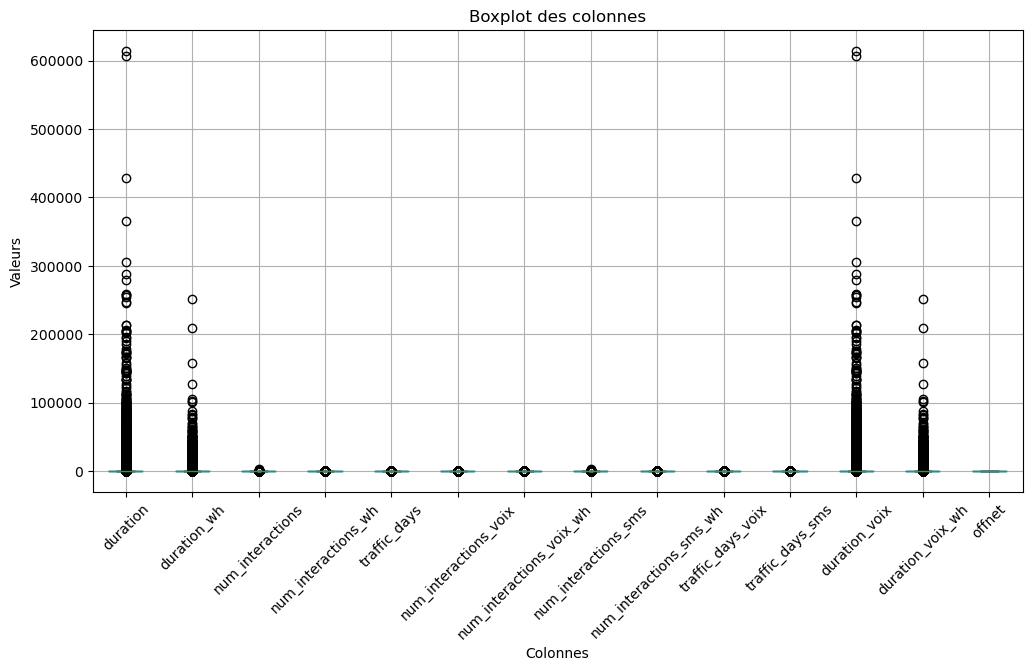

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(12, 6))
data2.boxplot(column=['duration', 'duration_wh', 'num_interactions', 'num_interactions_wh',
                   'traffic_days', 'num_interactions_voix', 'num_interactions_voix_wh',
                   'num_interactions_sms', 'num_interactions_sms_wh', 'traffic_days_voix',
                   'traffic_days_sms', 'duration_voix', 'duration_voix_wh', 'offnet'])
plt.xticks(rotation=45)
plt.title('Boxplot des colonnes')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')
plt.show()

In [8]:
print(data2.columns)

Index(['a_number', 'a_own', 'b_number', 'b_own', 'duration', 'duration_wh',
       'num_interactions', 'num_interactions_wh', 'traffic_days',
       'num_interactions_voix', 'num_interactions_voix_wh',
       'num_interactions_sms', 'num_interactions_sms_wh', 'traffic_days_voix',
       'traffic_days_sms', 'duration_voix', 'duration_voix_wh', 'offnet',
       'short_flag', 'dn'],
      dtype='object')


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = data2.select_dtypes(include=['object', 'category']).columns
correlation_matrix = data2[categorical_columns].apply(lambda x: x.astype('category').cat.codes).corr(method='pearson')
print(correlation_matrix)
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()

            a_number  b_number  short_flag
a_number    1.000000  0.001338   -0.000703
b_number    0.001338  1.000000   -0.027083
short_flag -0.000703 -0.027083    1.000000


"plt.figure(figsize=(14,12))\nsns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdYlGn')\nplt.title('Matrice de corrélation')\nplt.show()"

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = data2.corr()
print(correlation_matrix)
# Afficher la heatmap
'''plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Matrice de corrélation')
plt.show()'''

C:\Users\hp\AppData\Local\Temp\ipykernel_8956\4247657253.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data2.corr()


                             a_own     b_own  duration  duration_wh  \
a_own                     1.000000 -0.022845 -0.002084    -0.002089   
b_own                    -0.022845  1.000000  0.060583     0.054794   
duration                 -0.002084  0.060583  1.000000     0.844791   
duration_wh              -0.002089  0.054794  0.844791     1.000000   
num_interactions          0.000604  0.049157  0.487173     0.482522   
num_interactions_wh       0.000437  0.039368  0.442756     0.529962   
traffic_days              0.000406  0.061008  0.380262     0.394794   
num_interactions_voix     0.000576  0.050477  0.562023     0.561747   
num_interactions_voix_wh  0.000519  0.037499  0.468299     0.566350   
num_interactions_sms      0.000245  0.014455  0.050274     0.042133   
num_interactions_sms_wh  -0.000088  0.013627  0.045149     0.040541   
traffic_days_voix         0.000400  0.063496  0.381333     0.396527   
traffic_days_sms         -0.001038  0.034074  0.100831     0.075907   
durati

"plt.figure(figsize=(12,10))\nsns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn')\nplt.title('Matrice de corrélation')\nplt.show()"